# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №2: Линейные модели


**Общая информация**

**Срок сдачи:** 25 апреля 18:00 Сдача **очная** на онлайн занятии.


Используйте данный Ipython Notebook при оформлении домашнего задания.

Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0422, Задание 2] Фамилия Имя.



**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw2.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст, если явно не указана такая возможность. В противном случае -1 балл
<hr\>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

Здравствуйте, уважаемые студенты! 

В этом задании мы будем реализовать линейные модели. Необходимо реализовать линейную и логистическую регрессии с L2 регуляризацией

# Теоретическое введение



Линейная регрессия решает задачу регрессии и оптимизирует функцию потерь MSE 

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right], $$ где $y_i$ $-$ целевая функция,  $a_i = a(x_i) =  \langle\,x_i,w\rangle ,$ $-$ предсказание алгоритма на объекте $x_i$, $w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Не забываем, что здесь и далее  мы считаем, что в $x_i$ есть тождественный вектор единиц, ему соответствует вес $w_0$.


Логистическая регрессия является линейным классификатором, который оптимизирует так называемый функционал log loss:

$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right],$$
где  $y_i  \in \{0,1\}$ $-$ метка класса, $a_i$ $-$ предсказание алгоритма на объекте $x_i$. Модель пытается предсказать апостериорую вероятность объекта принадлежать к классу "1":
$$ p(y_i = 1 | x_i) = a(x_i) =  \sigma( \langle\,x_i,w\rangle ),$$
$w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Функция $\sigma(x)$ $-$ нелинейная функция, пероводящее скалярное произведение объекта на веса в число $\in (0,1)$ (мы же моделируем вероятность все-таки!)

$$\sigma(x) = \frac{1}{1 + \exp(-x)}$$

Если внимательно посмотреть на функцию потерь, то можно заметить, что в зависимости от правильного ответа алгоритм штрафуется или функцией $-\log a_i$, или функцией $-\log (1 - a_i)$.



Часто для решения проблем, которые так или иначе связаны с проблемой переобучения, в функционал качества добавляют слагаемое, которое называют ***регуляризацией***. Итоговый функционал для линейной регрессии тогда принимает вид:

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right] + \frac{1}{C}R(w) $$

Для логистической: 
$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right] +  \frac{1}{C}R(w)$$

Самое понятие регуляризации введено основателем ВМК академиком Тихоновым https://ru.wikipedia.org/wiki/Метод_регуляризации_Тихонова

Идейно методика регуляризации заключается в следующем $-$ мы рассматриваем некорректно поставленную задачу (что это такое можно найти в интернете), для того чтобы сузить набор различных вариантов (лучшие из которых будут являться переобучением ) мы вводим дополнительные ограничения на множество искомых решений. На лекции Вы уже рассмотрели два варианта регуляризации.

$L1$ регуляризация:
$$R(w) = \sum_{j=1}^{D}|w_j|$$
$L2$ регуляризация:
$$R(w) =  \sum_{j=1}^{D}w_j^2$$

С их помощью мы ограничиваем модель в  возможности выбора каких угодно весов минимизирующих наш лосс, модель уже не сможет подстроиться под данные как ей угодно. 

Вам нужно добавить соотвествущую Вашему варианту $L2$ регуляризацию.

И так, мы поняли, какую функцию ошибки будем минимизировать, разобрались, как получить предсказания по объекту и обученным весам. Осталось разобраться, как получить оптимальные веса. Для этого нужно выбрать какой-то метод оптимизации.



Градиентный спуск является самым популярным алгоритмом обучения линейных моделей. В этом задании Вам предложат реализовать стохастический градиентный спуск или  мини-батч градиентный спуск (мини-батч на русский язык довольно сложно перевести, многие переводят это как "пакетный", но мне не кажется этот перевод удачным). Далее нам потребуется определение **эпохи**.
Эпохой в SGD и MB-GD называется один проход по **всем** объектам в обучающей выборки.
* В SGD градиент расчитывается по одному случайному объекту. Сам алгоритм выглядит примерно так:
        1) Перемешать выборку
        2) Посчитать градиент функции потерь на одном объекте (далее один объект тоже будем называть батчем)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* В Mini Batch SGD - по подвыборке объектов. Сам алгоритм выглядит примерно так::
        1) Перемешать выборку, выбрать размер мини-батча (от 1 до размера выборки)
        2) Почитать градиент функции потерь по мини-батчу (не забыть поделить на  число объектов в мини-батче)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* Для отладки алгоритма реализуйте возможность  вывода средней ошибки на обучении модели по объектам (мини-батчам). После шага градиентного спуска посчитайте значение ошибки на объекте (или мини-батче), а затем усредните, например, по ста шагам. Если обучение проходит корректно, то мы должны увидеть, что каждые 100 шагов функция потерь уменьшается. 
* Правило останова - максимальное количество эпох
    


# Теоретические вопросы (2 балла)
В этой части Вам будут предложены теоретичские вопросы и задачи по теме. Вы, конечно, можете списать их у своего товарища или найти решение в интернете, но учтите, что они обязательно войдут в теоретический коллоквиум. Лучше разобраться в теме сейчас и успешно ответить на коллоквиуме, чем списать, не разобравшись в материале, и быть терзаемым совестью. 


Формулы надо оформлять в формате **LaTeX**.

Задача 1. Градиент для линейной регрессии.
* Выпишите формулу обновления весов для линейной регрессии с L2 регуляризацией для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент?

***Ваше решение здесь***

$a(x, w) = \langle x, w \rangle$

$L(w) = \frac{1}{N} \sum_{i=1}^N (y_i - a(x_i, w))^2 + \frac{1}{C} \|w \|^2 = \frac{1}{N} \| y - Xw \|^2 + \frac{1}{C} \|w \|^2 = \frac{1}{N} \langle  y - Xw,  y - Xw \rangle + \frac{1}{C}\langle w, w \rangle = \frac{1}{N} (y - Xw)^T(y - Xw) + \frac{1}{C} w^T w = \frac{1}{N} (y^Ty - 2y^TXw + w^TX^TXw) + \frac{1}{C} w^T w$

Продифференцируем данное выражение по $w$:

$\frac{dL(w)}{dw} =\frac{1}{N} (d\langle -2X^Ty,  w\rangle + d\langle Xw,  Xw\rangle) + \frac{1}{C} d\langle w, w \rangle = \frac{1}{N} (-2\langle X^Ty,  dw\rangle + 2\langle X^TXw,  dw\rangle) + \frac{1}{C} 2\langle w, dw \rangle$

Тогда получим:

$\nabla_wL(w) = \frac{2}{N}(X^TXw - X^Ty) + \frac{2}{C} w = \frac{2}{N}X^T(Xw - y) + \frac{2}{C} w$

$w_{new} = w_{old} - 2\alpha(\frac{1}{N} \sum_{i=1}^N x_i(\langle x_i, w_{old} \rangle - y_i) - \frac{1}{C}w_{old})$

Задача 2. Градиент для логистической регрессии.
* Выпишите формулу обновления весов для логистической регрессии с L2 регуляризацией  для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент? Как соотносится этот градиент с градиентом, возникающий в задаче линейной регрессии?

Подсказка: Вам градиент, которой получается если “в лоб” продифференцировать,  надо немного преобразовать.
Надо подставить, что $1 - \sigma(w,x) $ это  $1 - a(x_i)$, а  $-\sigma(w,x)$ это $0 - a(x_i)$.  Тогда получится свести к одной красивой формуле с линейной регрессией, которую программировать будет намного проще.

***Ваше решение здесь***

Для начала запишем наш функционал немого в другом ввиде. Для определённости будем считать, что $y_i \in \{-1, +1\}$. Введём обозначение $M_i = y_i\langle x_i, w\rangle$. И приведём нашу функцию к виду:
$$
L(w) = \frac{1}{N} \sum \limits_{i=1}^N log(1 + e^{-M_i}) + \frac{1}{C} \|w\|^2
$$

$$dL(w) = \frac{1}{N} \sum \limits_{i=1}^N dlog(1 + e^{-M_i}) + \frac{1}{C} d\|w\|^2 = \frac{1}{N} \sum \limits_{i=1}^N \frac{1}{1 + e^{-M_i}} \: d e^{-y_i\langle x_i, w\rangle} \; + $$
$$\frac{1}{C} d\langle w, w\rangle = \frac{1}{N} \sum \limits_{i=1}^N \frac{e^{-M_i}}{1 + e^{-M_i}} \: d(-y_i\langle x_i, w\rangle) + \frac{1}{C} \; 2 \langle w, dw\rangle  =$$
$$\frac{1}{N} \sum \limits_{i=1}^N \frac{-y_i}{1 + e^{M_i}} \:\langle x_i, dw\rangle) +\frac{2}{C}\langle w, dw\rangle = \langle -\frac{1}{N} \sum \limits_{i=1}^N \frac{y_i}{1 + e^{M_i}} x_i + \frac{2}{C} w, dw\rangle$$
Таким образом, получим, что градиент нашего функционала равен:
$$\nabla L(w) = -\frac{1}{N} \sum \limits_{i=1}^N \frac{y_i}{1 + e^{y_i\langle x_i, w\rangle}} \: x_i + \frac{2}{C} w$$

Тогда:
$$
w_{new} = w_{old} + \alpha(\frac{1}{N} \sum \limits_{i=1}^N \frac{y_i}{1 + e^{y_i\langle x_i, w\rangle}} \: x_i) - \frac{2}{C}w_{old})
$$

Если считать, что $y_i \in \{0, +1\}$, то выражение примет следующий вид:
$$
w_{new} = w_{old} - \alpha(\frac{1}{N} \sum \limits_{i=1}^N (a(x_i) - y_i) + \frac{2}{C}w_{old}), \;\;\; a(x_i) =  \sigma( \langle\,x_i,w\rangle )
$$

Задача 3. Точное решение линейной регрессии

На лекции было показано, что точное решение линейной регрессии имеет вид $w = (X^TX)^{-1}X^TY $. 
* Покажите, что это действительно является точкой минимума в случае, если матрица X имеет строк не меньше, чем столбцов и имеет полный ранг. Подсказка: посчитайте Гессиан и покажите, что в этом случае он положительно определен. 
* Выпишите точное решение для модели с $L2$ регуляризацией. Как L2 регуляризация помогает с точным решением где матрица X имеет линейно зависимые признаки?

***Ваше решение здесь***

$L(w) = \| y - Xw\|^2$. Как было показано ранее $L'(w) = 2X^T(Xw - y)$.

Продифференцируем данное выражение:
$$
\frac{dL'(w)}{dw} = d(2X^T(Xw - y) = 2X^TX
$$
Таким образом, гессиан нашей системы равен $2X^TX$. Покажем что он положительно определён. Для любого вектора $y$ верно:
$$
y^TX^TXy = \langle Xy, Xy\rangle = \| Xy \|^2 \geq 0
$$


Пусть теперь
$L(w) = \| y - Xw\|^2 + \frac{1}{C}\|w\|^2$. Тогда $\nabla_wL(w) = 2X^T(Xw - y) + \frac{2}{C} w = 0$ Получим:
$$
X^TXw - X^Ty + \frac{1}{C} Iw = 0 \;\;\; \Rightarrow \;\;\; (X^TX + \frac{1}{C} I) w =  X^Ty\ ;\;\; \Rightarrow \;\;\; w = (X^TX + \frac{1}{C} I)^{-1}X^Ty
$$
Если матрица $X$ имеет линейно зависимые признаки, то $X^TX$ вырождена и не существует обратной матрицыю. Добавляя единичную матрицу $I$, мы гарантируем, что точное решение существует.

Задача 4.  Предсказываем вероятности.

Когда говорят о логистической регрессии, произносят фразу, что она "предсказывает вероятности положительного класса". Давайте разберемся, что же за этим стоит. Посчитаем математическое ожидание функции потерь и проверим, что предсказание алгоритма, оптимизирующее это мат. ожидание, будет являться вероятностью положительного класса. 

И так, функция потерь на объекте $x_i$, который имеет метку $y_i \in \{0,1\}$  для предсказания $a(x_i)$ равна:
$$L(y_i, b) =-[y_i == 1] \log a(x_i)  - [y_i == 0] \log(1 - a(x_i)) $$

Где $[]$ означает индикатор $-$ он равен единице, если значение внутри него истинно, иначе он равен нулю. Тогда мат. ожидание при условии конкретного $x_i$  по определение мат. ожидания дискретной случайной величины:
$$E(L | x_i) = -p(y_i = 1 |x_i ) \log a(x_i)  - p(y_i = 0 | x_i) \log( 1 - a(x_i))$$
* Докажите, что значение $a(x_i)$, минимизирующее данное мат. ожидание, в точности равно $p(y_i = 1 |x_i)$, то есть равно вероятности положительного класса.

Подсказка: возможно, придется воспользоваться, что  $p(y_i = 1 | x_i) + p(y_i = 0 | x_i) = 1$

***Ваше решение здесь***

$$
\frac{dE(L | x_i)}{da(x_i)} = -\frac{p(y_i = 1 |x_i )}{a(x_i)} + \frac{p(y_i = 0 |x_i )}{1 - a(x_i)} = 0 \;\;\; \Rightarrow
$$

$$
\Rightarrow \;\;\;  p(y_i = 1 |x_i )(a(x_i) - 1) + p(y_i = 0 |x_i )a(x_i) =  -p(y_i = 1 |x_i ) + a(x_i)( p(y_i = 1 |x_i ) +  p(y_i = 0 |x_i ))  =  -p(y_i = 1 |x_i ) + a(x_i) = 0\;\;\; \Rightarrow \;\;\; 
$$

$$
\Rightarrow \;\;\;  p(y_i = 1 |x_i ) = a(x_i)
$$

Задача 5.  Смысл регуляризации.

Нужно ли в L1/L2 регуляризации использовать свободный член $w_0$ (который не умножается ни на какой признак)?

Подсказка: подумайте, для чего мы вводим $w_0$

***Ваше решение здесь***

В регуляризации, как правило, не нужно использовать $w_0$, т.к. он вводится для того, чтобы настроить смещение модели. А при помощи регуляризации мы настраиваем веса модели. 

#  Реализация линейной модели (4 балла)

## Зачем нужны батчи?


Как Вы могли заметить из теоретического введения, что в случае SGD, что в случа mini-batch GD,  на каждой итерации обновление весов  происходит только по небольшой части данных (1 пример в случае SGD, batch примеров в случае mini-batch). То есть для каждой итерации нам *** не нужна вся выборка***. Мы можем просто итерироваться по выборке, беря батч нужного размера (далее 1 объект тоже будем называть батчом).

Легко заметить, что в этом случае нам не нужно загружать все данные в оперативную память, достаточно просто считать батч с диска, обновить веса, считать диска другой батч и так далее. В целях упрощения домашней работы, прямо с диска  мы считывать не будем, будем работать с обычными numpy array. 





## Немножко про генераторы в Python



Идея считывания данных кусками удачно ложится на так называемые ***генераторы*** из языка Python. В данной работе Вам предлагается не только разобраться с логистической регрессией, но  и познакомиться с таким важным элементом языка.  При желании Вы можете убрать весь код, связанный с генераторами, и реализовать логистическую регрессию и без них, ***штрафоваться это никак не будет***. Главное, чтобы сама модель была реализована правильно, и все пункты были выполнены. 

Подробнее можно почитать вот тут https://anandology.com/python-practice-book/iterators.html


К генератору стоит относиться просто как к функции, которая порождает не один объект, а целую последовательность объектов. Новое значение из последовательности генерируется с помощью ключевого слова ***yield***. Ниже Вы можете насладиться  генератором чисел Фибоначчи.

In [1]:
def fib(max_iter=4):
    a, b = 0, 1
    iter_num = 0
    while 1:
        yield a
        a, b = b, a + b
        iter_num += 1
        if iter_num == max_iter:
            break

Вот так можно сгенерировать последовательность Фибоначчи. 

Заметьте, что к генераторам можно применять некоторые стандартные функции из Python, например enumerate.

In [2]:
new_generator = fib()
for j, fib_val in enumerate(new_generator):
    print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Пересоздавая объект, можно сколько угодно раз генерировать заново последовательность. 

In [3]:
for i in range(0, 3):
    new_generator = fib()
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


А вот так уже нельзя.

In [4]:
new_generator = fib()
for i in range(0, 3):
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Концепция крайне удобная для обучения  моделей $-$ у Вас есть некий источник данных, который Вам выдает их кусками, и Вам совершенно все равно откуда он их берет. Под ним может скрывать как массив в оперативной памяти, как файл на жестком диске, так и SQL база данных. Вы сами данные никуда не сохраняете, оперативную память экономите.

Если Вам понравилась идея с генераторами, то Вы можете реализовать свой, используя прототип batch_generator. В нем Вам нужно выдавать батчи признаков и ответов для каждой новой итерации спуска. Если не понравилась идея, то можете реализовывать SGD или mini-batch GD без генераторов.

In [5]:
def batch_generator(X, y, shuffle=True, batch_size=1):
    """
    Гератор новых батчей для обучения
    X          - матрица объекты-признаки
    y_batch    - вектор ответов
    shuffle    - нужно ли случайно перемешивать выборку
    batch_size - размер батча ( 1 это SGD, > 1 mini-batch GD)
    Генерирует подвыборку для итерации спуска (X_batch, y_batch)
    """
    size = X.shape[0]
    ind = np.arange(size)
    if shuffle:
        np.random.shuffle(ind)
    for i in range(0, size, batch_size):
        X_batch = X[ind[i : min(size, i + batch_size)]]
        y_batch = y[ind[i : min(size, i + batch_size)]]
        yield (X_batch, y_batch)

# Теперь можно сделать генератор по данным ()
#  my_batch_generator = batch_generator(X, y, shuffle=True, batch_size=1):

In [6]:
import numpy as np

In [105]:
#%%pycodestyle

def sigmoid(x):
    """
    Вычисляем значение сигмоида.
    X - выход линейной модели
    """
    
    ## Your code Here
    return 1 / (1 + np.exp(-x))


from sklearn.base import BaseEstimator, ClassifierMixin

class MySGDClassifier(BaseEstimator, ClassifierMixin):
    
    def __init__(self, batch_generator, C=1, alpha=0.01, max_epoch=10, model_type='lin_reg', batch_size=1, threshold=0.5):
        """
        batch_generator -- функция генератор, которой будем создавать батчи
        C - коэф. регуляризации
        alpha - скорость спуска
        max_epoch - максимальное количество эпох
        model_type - тим модели, lin_reg или log_reg
        """
        
        self.C = C
        self.alpha = alpha
        self.max_epoch = max_epoch
        self.batch_generator = batch_generator
        self.errors_log = {'iter' : [], 'loss' : []}  
        self.model_type = model_type
        self.batch_size = batch_size
        self.threshold = threshold
        
    def calc_loss(self, X_batch, y_batch):
        """
        Считаем функцию потерь по батчу 
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        if self.model_type == 'lin_reg':
            loss = ((np.dot(X_batch, self.weights) - y_batch)**2).mean()
            loss += np.sum(self.weights ** 2) / self.C
        else:
            sigma = sigmoid(np.dot(X_batch, self.weights))
            loss = -(y_batch * np.log(sigma) + (1 - y_batch) * np.log(1 - sigma)).mean()
            loss += np.sum(self.weights ** 2) / self.C
        return loss
    
    def calc_loss_grad(self, X_batch, y_batch):
        """
        Считаем  градиент функции потерь по батчу (то что Вы вывели в задании 1)
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        if self.model_type == 'lin_reg':
            loss_grad = 2*np.dot(X_batch.T, np.dot(X_batch, self.weights) - y_batch) / X_batch.shape[0]
            loss_grad += 2*self.weights / self.C
        else:
            sigma = sigmoid(np.dot(X_batch, self.weights))
            loss_grad = np.dot(X_batch.T, sigma - y_batch) / X_batch.shape[0]
            loss_grad +=  2*self.weights / self.C
        return loss_grad
    
    def update_weights(self, new_grad):
        """
        Обновляем вектор весов
        new_grad - градиент по батчу
        """
        self.weights -= self.alpha*new_grad
        pass
    
    def fit(self, X, y):
        '''
        Обучение модели
        X - матрица объекты-признаки
        y - вектор ответов
        '''
        X_new = np.hstack((np.ones((X.shape[0], 1)), X)) #add w0
        # Нужно инициализровать случайно веса
        self.weights =  np.random.uniform(-1, 1, X_new.shape[1])
        for n in range(0, self.max_epoch):
            new_epoch_generator = self.batch_generator(X_new, y, self.batch_size)
            for batch_num, new_batch in enumerate(new_epoch_generator):
                X_batch = new_batch[0]
                y_batch = new_batch[1]
                batch_grad = self.calc_loss_grad(X_batch, y_batch)
                self.update_weights(batch_grad)
                batch_loss = self.calc_loss(X_batch, y_batch)
                self.errors_log['iter'].append(batch_num)
                self.errors_log['loss'].append(batch_loss) 
        return self
        
    def predict(self, X):
        '''
        Предсказание класса
        X - матрица объекты-признаки
        Не забудте тип модели (линейная или логистическая регрессия)!
        '''
        X_new = np.hstack((np.ones((X.shape[0], 1)), X)) #add w0
        # Желательно здесь использовать матричные операции между X и весами, например, numpy.dot
        if self.model_type == 'lin_reg':
            y_hat = (np.dot(X_new, self.weights) > 0).astype(int)
        else:
            y_hat = (sigmoid(np.dot(X_new, self.weights)) > self.threshold).astype(int)
        return y_hat

Запустите обе регрессии на синтетических данных. 


Выведите полученные веса и нарисуйте разделяющую границу между классами (используйте только первых два веса для первых двух признаков X[:,0], X[:,1] для отображения в 2d пространство ).  

In [10]:
import matplotlib
import matplotlib.pyplot as plt

In [20]:
def plot_decision_boundary(clf, label):
    ## Your code Here
    x = np.linspace(-6, 8, 2)
    w_0 = clf.weights[0]
    w_1 = clf.weights[1]
    w_2 = clf.weights[2]
    plt.plot(x, -(w_1 * x + w_0) / w_2, label=label)

In [19]:
np.linspace(-6, 10, 2)

array([-6., 10.])

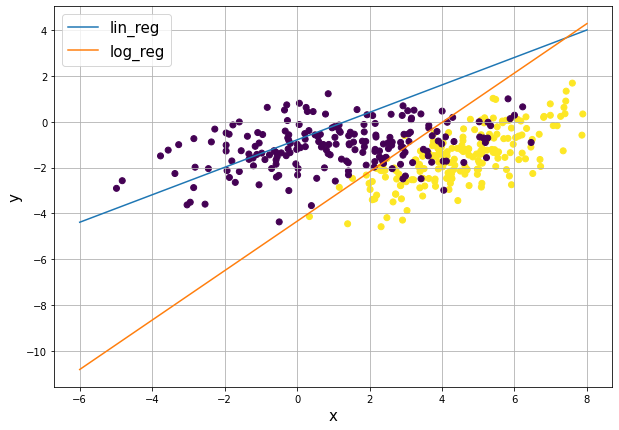

In [29]:
np.random.seed(0)

C1 = np.array([[0., -0.8], [1.5, 0.8]])
C2 = np.array([[1., -0.7], [2., 0.7]])
gauss1 = np.dot(np.random.randn(200, 2) + np.array([5, 3]), C1)
gauss2 = np.dot(np.random.randn(200, 2) + np.array([1.5, 0]), C2)

X = np.vstack([gauss1, gauss2])
y = np.r_[np.ones(200), np.zeros(200)]

plt.figure(figsize=(10, 7))

lin_reg = MySGDClassifier(batch_generator, C=500, model_type='lin_reg')
lin_reg.fit(X, y)
plot_decision_boundary(lin_reg,'lin_reg')

log_reg = MySGDClassifier(batch_generator, C=500, model_type='log_reg')
log_reg.fit(X, y)
plot_decision_boundary(log_reg,'log_reg')

plt.legend(fontsize=15)
plt.xlabel('x', fontsize=15)
plt.ylabel('y', fontsize=15)
plt.grid(True)
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

Далее будем анализировать Ваш алгоритм. 
Для этих заданий используйте датасет ниже.

In [23]:
from sklearn.datasets import make_classification

In [24]:
X, y = make_classification(n_samples=100000, n_features=10, 
                           n_informative=4, n_redundant=0, 
                           random_state=123, class_sep=1.0,
                           n_clusters_per_class=1)

Покажите сходимости обеих регрессией на этом датасете: изобразите график  функции потерь, усредненной по $N$ шагам градиентого спуска, для разных `alpha` (размеров шага). Разные `alpha` расположите на одном графике. 

$N$ можно брать 10, 50, 100 и т.д. 

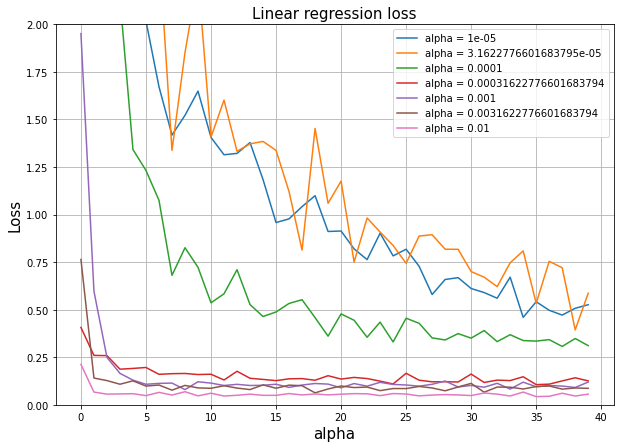

In [45]:
plt.figure(figsize=(10, 7))
plt.ylim(0, 2)
N = 100
for alpha in np.logspace(-5,-2, 7):
    lin_reg = MySGDClassifier(batch_generator, alpha=alpha, C=500, model_type='lin_reg')
    lin_reg.fit(X, y)
    mean_loss = []
    for i in range(len(lin_reg.errors_log['loss']) // N):
        mean_loss.append(np.mean(lin_reg.errors_log['loss'][i * N : (i + 1) * N]))
    plt.plot(np.arange(len(mean_loss)), mean_loss, label=f'alpha = {alpha}')
plt.title('Linear regression loss',fontsize=15)
plt.legend()
plt.xlabel('alpha', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.grid(True)
plt.show()

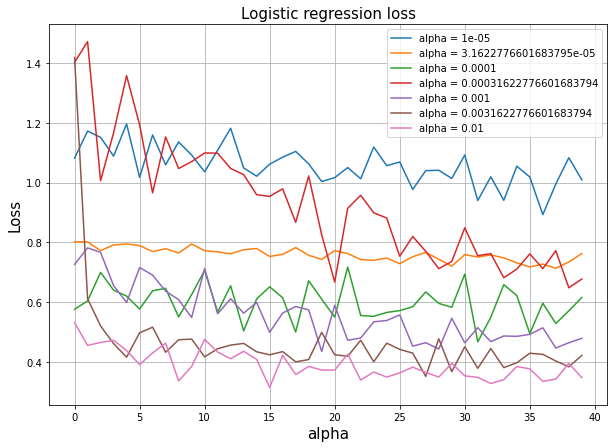

In [50]:
plt.figure(figsize=(10, 7))
#plt.ylim(0, 2)
N = 100
for alpha in np.logspace(-5,-2, 7):
    log_reg = MySGDClassifier(batch_generator, alpha=alpha, C=500, model_type='log_reg')
    log_reg.fit(X, y)
    mean_loss = []
    for i in range(len(log_reg.errors_log['loss']) // N):
        mean_loss.append(np.mean(log_reg.errors_log['loss'][i * N : (i + 1) * N]))
    plt.plot(np.arange(len(mean_loss)), mean_loss, label=f'alpha = {alpha}')
plt.title('Logistic regression loss',fontsize=15)
plt.legend()
plt.xlabel('alpha', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.grid(True)
plt.show()

Что Вы можете сказать про сходимость метода при различных `alpha`? Какое значение стоит выбирать для лучшей сходимости?

Видно, что линейная регрессия сходится и показывает меньший лосс при более больших альфа. То же можно сказать и логистической регрессии, правда о сходимости сложно говорить, так как график постоянно колеблется.

Изобразите график среднего значения весов для обеих регрессий в зависимости от коеф. регуляризации С из `np.logspace(3, -3, 10)` 

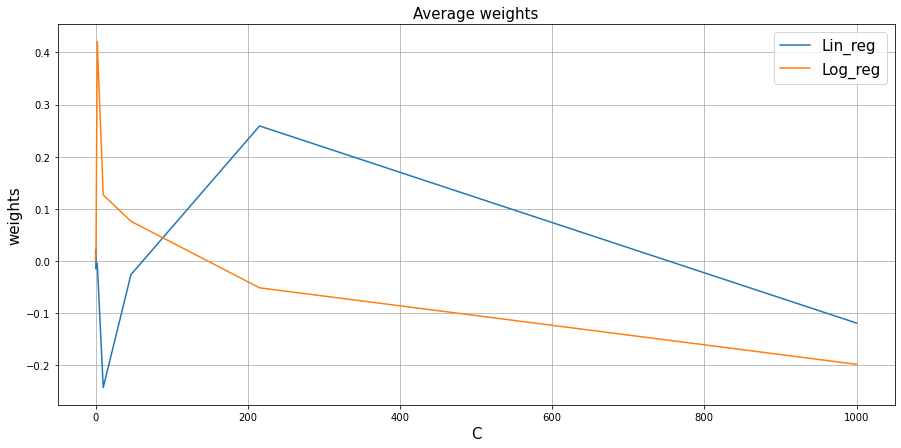

In [68]:
means_lin = []
means_log = []
for C in np.logspace(3, -3, 10):
    lin_reg = MySGDClassifier(batch_generator, model_type='lin_reg', alpha=0.0001, C=C)
    lin_reg.fit(X, y)
    means_lin.append(np.mean(lin_reg.weights))
    
    log_reg = MySGDClassifier(batch_generator, model_type='log_reg', alpha=0.0001, C=C)
    log_reg.fit(X, y)
    means_log.append(np.mean(log_reg.weights))

plt.figure(figsize=(15, 7))
plt.plot(np.logspace(3, -3, 10), means_lin, label='Lin_reg')
plt.plot(np.logspace(3, -3, 10), means_log, label='Log_reg')
plt.title('Average weights', fontsize=15)
plt.legend(fontsize=15)
plt.xlabel('C', fontsize=15)
plt.ylabel('weights', fontsize=15)
plt.grid(True)
plt.show()

Довольны ли Вы, насколько сильно уменьшились Ваши веса? 

Очень!

# Боевое применение (4  балла)

**Защита данной части возможна только при преодолении в проекте бейзлайна Handmade baseline.**

Давайте применим модель на итоговом проекте! Датасет сделаем точно таким же образом, как было показано в project_overview.ipynb

Применим обе регрессии, подберем для них параметры и сравним качество. Может быть Вы еще одновременно с решением домашней работы подрастете на лидерборде!

In [70]:
doc_to_title = {}
with open('docs_titles.tsv', encoding='utf-8') as f:
    for num_line, line in enumerate(f):
        if num_line == 0:
            continue
        data = line.strip().split('\t', 1)
        doc_id = int(data[0])
        if len(data) == 1:
            title = ''
        else:
            title = data[1]
        doc_to_title[doc_id] = title
print (len(doc_to_title))


28026


In [71]:
import pandas as pd
train_data = pd.read_csv('train_groups.csv')
traingroups_titledata = {}
for i in range(len(train_data)):
    new_doc = train_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    target = new_doc['target']
    title = doc_to_title[doc_id]
    if doc_group not in traingroups_titledata:
        traingroups_titledata[doc_group] = []
    traingroups_titledata[doc_group].append((doc_id, title, target))

In [72]:
import numpy as np
y_train = []
X_train = []
groups_train = []
for new_group in traingroups_titledata:
    docs = traingroups_titledata[new_group]
    for k, (doc_id, title, target_id) in enumerate(docs):
        y_train.append(target_id)
        groups_train.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j, target_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_train.append(sorted(all_dist, reverse=True)[0:15])
X_train = np.array(X_train)
y_train = np.array(y_train)
groups_train = np.array(groups_train)
print (X_train.shape, y_train.shape, groups_train.shape)

(11690, 15) (11690,) (11690,)


In [74]:
test_data = pd.read_csv('test_groups.csv')
testgroups_titledata = {}
for i in range(len(test_data)):
    new_doc = test_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    title = doc_to_title[doc_id]
    if doc_group not in testgroups_titledata:
        testgroups_titledata[doc_group] = []
    testgroups_titledata[doc_group].append((doc_id, title))

In [75]:
X_test = []
groups_test = []
for new_group in testgroups_titledata:
    docs = testgroups_titledata[new_group]
    for k, (doc_id, title) in enumerate(docs):
        groups_test.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_test.append(sorted(all_dist, reverse=True)[0:15]    )
X_test = np.array(X_test)
groups_test = np.array(groups_test)
print (X_test.shape, groups_test.shape)

(16627, 15) (16627,)


Подберите размер батча для обучения. Линейная модель не должна учиться дольше нескольких минут. 

Не забывайте использовать скейлер!

In [73]:
from sklearn.metrics import f1_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [76]:
from sklearn.model_selection import StratifiedKFold, cross_val_score, StratifiedShuffleSplit
skf = StratifiedShuffleSplit(n_splits=3)

In [102]:
batch_sizes = [1, 5, 10, 20, 50, 100, 200, 500, 1000, 5000]
lin = []
log = []
for size in batch_sizes:
    lin_reg = MySGDClassifier(batch_generator, model_type='lin_reg', batch_size=size, alpha=0.001)
    log_reg = MySGDClassifier(batch_generator, model_type='log_reg', batch_size=size)
    lin_val = []
    log_val = []
    for train_idx, test_idx in skf.split(X_train, y_train):
        lin_reg.fit(X_train[train_idx], y_train[train_idx])
        y_pred_lin = lin_reg.predict(X_train[test_idx])
        lin_val.append(f1_score(y_train[test_idx], y_pred_lin))
        
        log_reg.fit(X_train[train_idx], y_train[train_idx])
        y_pred_log = log_reg.predict(X_train[test_idx])
        log_val.append(f1_score(y_train[test_idx], y_pred_log))
    
    lin.append(np.mean(lin_val))
    log.append(np.mean(log_val))


lin_batch_size = batch_sizes[np.argmax(lin)]
log_batch_size = batch_sizes[np.argmax(log)]
lin_batch_size, log_batch_size

(500, 20)

Разбейте данные на обучение и валидацию. Подберите параметры C, alpha, max_epoch, model_type на валидации (Вы же помните, как правильно в этой задаче делать валидацию?)

In [89]:
C = [1, 2, 5, 10, 50, 100, 200, 500, 1000, 5000]
lin = []
log = []
for c in C:
    lin_reg = MySGDClassifier(batch_generator, C=c, model_type='lin_reg', batch_size=lin_batch_size, alpha=0.001)
    log_reg = MySGDClassifier(batch_generator, C=c, model_type='log_reg', batch_size=log_batch_size)
    lin_val = []
    log_val = []
    for train_idx, test_idx in skf.split(X_train, y_train):
        lin_reg.fit(X_train[train_idx], y_train[train_idx])
        y_pred_lin = lin_reg.predict(X_train[test_idx])
        lin_val.append(f1_score(y_train[test_idx], y_pred_lin))
        
        log_reg.fit(X_train[train_idx], y_train[train_idx])
        y_pred_log = log_reg.predict(X_train[test_idx])
        log_val.append(f1_score(y_train[test_idx], y_pred_log))
    
    lin.append(np.mean(lin_val))
    log.append(np.mean(log_val))
    
lin_c = C[np.argmax(lin)]
log_c = C[np.argmax(log)]
lin_c, log_c

(100, 10)

In [95]:
alphas = [1e-4, 5e-4, 1e-3, 5e-3, 1e-2]
lin = []
log = []
for alpha in alphas:
    lin_reg = MySGDClassifier(batch_generator, C=lin_c, alpha=alpha, 
                              model_type='lin_reg', batch_size=lin_batch_size)
    log_reg = MySGDClassifier(batch_generator, C=log_c, alpha=alpha,
                              model_type='log_reg', batch_size=log_batch_size)
    lin_val = []
    log_val = []
    for train_idx, test_idx in skf.split(X_train, y_train):
        lin_reg.fit(X_train[train_idx], y_train[train_idx])
        y_pred_lin = lin_reg.predict(X_train[test_idx])
        lin_val.append(f1_score(y_train[test_idx], y_pred_lin))
        
        log_reg.fit(X_train[train_idx], y_train[train_idx])
        y_pred_log = log_reg.predict(X_train[test_idx])
        log_val.append(f1_score(y_train[test_idx], y_pred_log))
    
    lin.append(np.mean(lin_val))
    log.append(np.mean(log_val))

lin_alpha = alphas[np.argmax(lin)]
log_alpha = alphas[np.argmax(log)]
lin_alpha, log_alpha

(0.0001, 0.0001)

In [97]:
epochs = [5, 10, 15, 25, 50, 70, 100]
lin = []
log = []
for epoch in epochs:
    lin_reg = MySGDClassifier(batch_generator, C=lin_c, alpha=lin_alpha,
                              max_epoch=epoch, model_type='lin_reg', batch_size=lin_batch_size)
    log_reg = MySGDClassifier(batch_generator, C=log_c, alpha=log_alpha,
                              max_epoch=epoch, model_type='log_reg', batch_size=log_batch_size)
    lin_val = []
    log_val = []
    for train_idx, test_idx in skf.split(X_train, y_train):
        lin_reg.fit(X_train[train_idx], y_train[train_idx])
        y_pred_lin = lin_reg.predict(X_train[test_idx])
        lin_val.append(f1_score(y_train[test_idx], y_pred_lin))
        
        log_reg.fit(X_train[train_idx], y_train[train_idx])
        y_pred_log = log_reg.predict(X_train[test_idx])
        log_val.append(f1_score(y_train[test_idx], y_pred_log))
    
    lin.append(np.mean(lin_val))
    log.append(np.mean(log_val))

lin_epoch = epochs[np.argmax(lin)]
log_epoch = epochs[np.argmax(log)]
lin_epoch, log_epoch

(5, 25)

In [101]:
if np.max(lin_val) > np.max(log_val):
    model_type, C, alpha, max_epoch, batch_size = 'lin_reg', lin_c, lin_alpha, lin_epoch, lin_batch_size
else:
    model_type, C, alpha, max_epoch, batch_size = 'log_reg', log_c, log_alpha, log_epoch, log_batch_size
model_type

'log_reg'

Подберите порог линейной модели, по достижении которого, Вы будете относить объект к классу 1. Вспомните, какую метрику мы оптимизируем в соревновании.  Как тогда правильно подобрать порог?

In [109]:
thresholds = [0.2, 0.3, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.8]
res = []
for threshold in thresholds:
    clf = MySGDClassifier(batch_generator, alpha=alpha, C=C, max_epoch=max_epoch, 
                          model_type=model_type, batch_size=batch_size, threshold=threshold)
    val = []
    for train_idx, test_idx in skf.split(X_train, y_train):
        clf.fit(X_train[train_idx], y_train[train_idx])
        y_pred = clf.predict(X_train[test_idx])
        val.append(f1_score(y_train[test_idx], y_pred))
    res.append(np.mean(val))

thresh = thresholds[np.argmax(res)]
thresh

0.45

С лучшими параметрами на валидации сделайте предсказание на тестовом множестве, отправьте его на проверку на платформу kaggle. Убедитесь, что Вы смогли побить public score первого бейзлайна.

** При сдаче домашки Вам необходимо кроме ссылки на ноутбук показать Ваш ник на kaggle, под которым Вы залили решение, которое побило Handmade baseline. **

In [115]:
clf = MySGDClassifier(batch_generator, alpha=alpha, C=C, max_epoch=max_epoch, 
                      model_type=model_type, batch_size=batch_size, threshold=thresh)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [116]:
pair_ids = test_data['pair_id']

file = open("predict.csv", "wb")
file.write(bytes(str("pair_id,target\n"), "utf-8"))
for k, pair_id in enumerate(pair_ids):
    file.write(bytes(str(pair_id) + "," +str(y_pred[k]) + str("\n"), "utf-8"))
file.close()

# Фидбек (бесценно)

* Какие аспекты обучения линейных моделей Вам показались непонятными? Какое место стоит дополнительно объяснить?

***Ваше ответ здесь***

* Здесь Вы можете оставить отзыв о этой домашней работе или о всем курсе.   

*** ВАШ ОТЗЫВ ЗДЕСЬ***